In [1]:
# Final_Samples
import pandas as pd
import numpy as np
import json
import random
usable_samples_ADNI = json.load(open('./usable_samples_ADNI.json'))
PRS_orig_feature_matrix = np.load('./PRS_feature_matrix.npy').astype(np.float32)
PRS_orig_feature_matrix = (PRS_orig_feature_matrix - PRS_orig_feature_matrix.mean(0))/PRS_orig_feature_matrix.std(0)
PRS_orig_feature_matrix.shape[1], len(usable_samples_ADNI), usable_samples_ADNI
num_features=PRS_orig_feature_matrix.shape[1]
print(num_features)

34


In [2]:
num_features = 23
hidden = 4
hidden_dimension = 32

In [3]:
import os
try: 
    os.mkdir("shap/" + str(num_features)) 
except OSError as error: 
    print("Folder already exists!")  

Folder already exists!


In [4]:
PRS_feature_matrix = PRS_orig_feature_matrix
PRS_feature_matrix = PRS_feature_matrix[:, :num_features]
print(PRS_feature_matrix.shape)

(1816, 23)


In [47]:
mask = np.random.choice([False, True], len(PRS_feature_matrix), p=[0.75, 0.25])
PRS_feature_matrix_2 = PRS_feature_matrix[mask]
print(PRS_feature_matrix_2.shape)

(440, 23)


In [5]:
a = np.array([['a',1],['b',2],['c',3],['d',4]]).tolist()
random.shuffle(a)
a

[['b', '2'], ['c', '3'], ['d', '4'], ['a', '1']]

In [6]:
df = pd.read_csv('./COVAR_FILE_bigger_dataset.txt', ' ') 
print("shape",df.shape)
print( df[['AGE', 'PTGENDER']].shape, df[['AGE', 'PTGENDER']].dropna().shape )
print( df.head() ) # PC - Principal Component

shape (1817, 14)
(1817, 2) (1817, 2)
                FID               IID       PC1       PC2       PC3       PC4  \
0  ADNI3_036_S_6231  ADNI3_036_S_6231 -0.006724 -0.010617  0.001596 -0.000460   
1  ADNI3_006_S_6277  ADNI3_006_S_6277 -0.010432 -0.010269  0.012757  0.006921   
2  ADNI3_129_S_6146  ADNI3_129_S_6146 -0.004919 -0.011656 -0.035521  0.064641   
3  ADNI3_033_S_6352  ADNI3_033_S_6352 -0.014069 -0.010279  0.020014  0.053023   
4  ADNI3_027_S_6183  ADNI3_027_S_6183 -0.010766 -0.012370 -0.010960  0.029830   

        PC5       PC6       PC7       PC8       PC9      PC10  PTGENDER   AGE  
0 -0.013131 -0.005855 -0.005142 -0.009063 -0.001739 -0.012863         1  69.1  
1 -0.014958 -0.005860 -0.027775 -0.009632  0.054966  0.087390         1  70.7  
2  0.012094  0.003860  0.035955  0.006561  0.019736 -0.023304         1  65.5  
3  0.023691  0.000247 -0.002273 -0.030627 -0.053461  0.049984         0  71.4  
4 -0.019520 -0.001955  0.023844  0.079138  0.002207  0.008892         0  65.

C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
import numpy as np
import pandas as pd
AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]
AGE_GENDER_PTID_map['PTGENDER'] = (AGE_GENDER_PTID_map['PTGENDER'] == 'Female').astype(int)
AGE_GENDER_PTID_map

C:\Users\HP\AppData\Local\Temp\ipykernel_2384\2969402204.py:3: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]


,PTID,PTGENDER,AGE
0,011_S_0002,0,74.3
1,011_S_0003,0,81.3
2,011_S_0003,0,81.3
3,011_S_0003,0,81.3
4,011_S_0003,0,81.3
...,...,...,...
15117,021_S_6896,0,64.8
15118,035_S_4464,0,70.4
15119,041_S_5097,0,67.5
15120,027_S_5288,1,81.9


In [8]:

# COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
cnt = 0
print("shape1",PRS_feature_matrix.shape)
FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
print("shape2",FEATURE_MATRIX.shape)
for sample in usable_samples_ADNI:
    covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32) # taking from the PCs, skipping the first two columns of IID, FID
#     if cnt < 2:
#         print(covar)
    if covar.shape[0] != 1:
#         print(sample)
        cnt += 1
        continue
#     FEATURE_MATRIX[usable_samples_ADNI[sample], 23:] = covar
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

    FEATURE_MATRIX[usable_samples_ADNI[sample], num_features:] = covar # naeem's modification
cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

shape1 (1816, 23)
shape2 (1816, 35)


(0.1288546255506608,
 array([[-5.6206602e-01,  1.5833879e+00,  3.6035888e-02, -5.0156575e-01,
          6.5592009e-01,  2.0768111e+00, -2.5817478e-01,  1.3769143e+00,
         -7.8878814e-01, -2.0883363e-01,  8.8257521e-01,  1.5471818e+00,
          6.4279914e-01, -8.1201518e-01,  1.4735116e+00, -4.5751646e-02,
          4.2786098e-01, -1.0208811e+00,  1.9010180e-01, -1.5337672e+00,
          3.4892298e-02,  6.7549521e-01,  4.4062281e-01, -6.7239902e-03,
         -1.0617300e-02,  1.5955199e-03, -4.6042900e-04, -1.3131300e-02,
         -5.8546802e-03, -5.1415302e-03, -9.0632401e-03, -1.7389200e-03,
         -1.2863100e-02,  1.0000000e+00,  6.9099998e+01],
        [-4.5909986e-01, -4.5436200e-01, -5.2110817e-02, -9.1423553e-01,
          2.4560858e-01,  5.9753662e-01,  1.0644186e+00, -2.8283790e-01,
          2.6224835e+00,  3.5013828e-02,  1.3060592e+00,  2.8968764e-02,
         -5.5759084e-01,  2.1927162e-01, -3.7697020e-01,  6.6405241e-03,
         -1.8602200e-01, -4.4763651e-02, -2.0

In [9]:
!conda list

# packages in environment at C:\Users\HP\.conda\envs\ad_venv_2:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    anaconda
asttokens                 2.0.5              pyhd3eb1b0_0    anaconda
backcall                  0.2.0              pyhd3eb1b0_0    anaconda
blas                      1.0                         mkl  
bottleneck                1.3.5           py310h9128911_0  
brotli                    1.0.9                ha925a31_2  
brotlipy                  0.7.0           py310h2bbff1b_1002  
bzip2                     1.0.8                he774522_0    anaconda
ca-certificates           2022.4.26            haa95532_0    anaconda
certifi                   2022.6.15       py310haa95532_0    anaconda
cffi                      1.15.0          py310h2bbff1b_1  
charset-normalizer        2.0.4              pyhd3eb1b0_0  
cloudpickle               2.0.0              pyhd3eb1b0_0  
colorama                

In [10]:
def save_in_file(model_name, accuracy):
    model_file = open("model_details.txt","a")
    model_file.write(model_name + " -> accuracy : " + str(accuracy) + "\n" )
    model_file.close() 

In [11]:
if True:   
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn


import os
import time
import sys

import torch as t
from torch import nn
from torch.autograd import Variable

feature_indices_to_consider = list(range(num_features))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
hidden = 4
class simple_model(nn.Module):
    def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32*4, drop_probab=0.3):
        super(simple_model, self).__init__()
        
        ####
        self.drop_probab = drop_probab
        self.dropout_feature = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(num_features, hidden_dim)
        self.dropout1 = nn.Dropout(p=self.drop_probab)
        num_hidden = hidden
        self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
        self.dropout_hidden = nn.ModuleList([nn.Dropout(p=0.0) for i in range(num_hidden)])
        self.fc2 = nn.Linear(hidden_dim, 8)
        self.dropout2 = nn.Dropout(p=0.3)
        self.outLayer = nn.Linear(8, 1)
#         self.softmax = nn.Softmax(-1)
        self.sigmoid = nn.Sigmoid()
        self.num_hidden = num_hidden
        ####

    def forward(self, features):
        features = self.dropout_feature(features)
        features = self.fc1(features)
        features = self.dropout1(features)
        for i in range(self.num_hidden):
            features = self.fc_hidden[i](features)
            features = self.dropout_hidden[i](features)
        features = self.fc2(features)
        features = self.dropout2(features)
        logit = self.outLayer(features)
#         print(features.shape, features)
        probab = self.sigmoid(logit)
        return probab
    

In [12]:
if True:
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn


import os
import time
import sys

import torch as t
from torch import nn
from torch.autograd import Variable

# feature_indices_to_consider = list(range(23))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
# naeem modified
feature_indices_to_consider = list(range(num_features))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
# feature_indices_to_consider = [0, 1, 2, 4, 7, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21]
feature_indices_to_consider = [ 0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 29, 32]

class simple_model(nn.Module):
    def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32, drop_probab=.8):
        super(simple_model, self).__init__()
        
        ####
        num_hidden = hidden
        hidden_dim = hidden_dimension
        self.fc1 = nn.Linear(num_features, hidden_dim)
        self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
        self.fc2 = nn.Linear(hidden_dim, 8)
        self.outLayer = nn.Linear(8, 1)
#         self.softmax = nn.Softmax(-1)
        self.sigmoid = nn.Sigmoid()
        self.num_hidden = num_hidden
        self.drop_probab = drop_probab
        self.dropout = nn.functional.dropout
        ####

    def forward(self, features):
        features = self.fc1(features)
        features = self.dropout(features, p=self.drop_probab)
        for i in range(self.num_hidden):
            features = self.fc_hidden[i](features)
        features = self.fc2(features)
        features = self.dropout(features, p=self.drop_probab)
        logit = self.outLayer(features)
#         print(features.shape, features)
        probab = self.sigmoid(logit)
        return probab
    

In [13]:
import json
import numpy as np
import random

In [14]:
Final_Samples = json.load(open('Final_Samples.json', 'r')) 
positive_samples = 0
negative_samples = 0
for x in Final_Samples:
    if x[1] == 1 :
        positive_samples += 1
    else :
        negative_samples += 1
        
print(len(Final_Samples))
print(positive_samples)
print(negative_samples)

1798
654
1144


In [15]:
print(len(Final_Samples))
positive_samples = Final_Samples[:654] # Final_Samples[654:]
positive_samples = Final_Samples[:654]
negative_samples = Final_Samples[654:]
print(len(positive_samples))
print(len(negative_samples))
len_pos = len(positive_samples)
len_neg = len(negative_samples)
min_len = min(len_pos, len_neg)
random_seed = None
if random_seed is not None: 
    random.seed(random_seed * 2)
random.shuffle(positive_samples)
random.shuffle(negative_samples)
Final_Samples = positive_samples[:500] + negative_samples[:500]
# Final_Samples = positive_samples[:min_len] + negative_samples[:min_len]
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
Final_Samples = np.array(Final_Samples)
Final_Samples.shape
# Final_Samples.reshape(10, -1, 2).shape

1798
654
1144
500 500


(1000, 2)

In [16]:
simple_model(num_features=len(feature_indices_to_consider))

simple_model(
  (fc1): Linear(in_features=23, out_features=32, bias=True)
  (fc_hidden): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
  )
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (outLayer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [17]:
import torch
from torch.utils import data

class dataSet(data.Dataset):
    def __init__(self, Final_Samples, feature_matrix, usable_samples_ADNI, feature_indices_to_consider=feature_indices_to_consider):
        super(dataSet, self).__init__()  
        self.data_len = len(Final_Samples)
        self.usable_samples_ADNI = usable_samples_ADNI
        self.Final_Samples = Final_Samples
        self.feature_indices_to_consider = feature_indices_to_consider
        self.feature_matrix = feature_matrix[:, self.feature_indices_to_consider]
        
    def __getitem__(self, index):
        features = torch.from_numpy(self.feature_matrix[self.usable_samples_ADNI[self.Final_Samples[index][0]]]).float()
        label = torch.tensor([float(self.Final_Samples[index][1])]).float()
        return features, label
    
    def update_prs_features(self, mean, std):
        self.feature_matrix = (self.feature_matrix - mean) / std
        
    def get_mean_std(self):
        mean = self.feature_matrix.mean(0)
        std = self.feature_matrix.std(0)
        return mean, std
        
    def __len__(self):
        return self.data_len

In [18]:

def random_samples(total_folds, random_seed=None):
    Final_Samples = json.load(open('Final_Samples.json', 'r')) 
    positive_samples = Final_Samples[:654]
    negative_samples = Final_Samples[654:]
    if random_seed is not None: 
        random.seed(random_seed * 2)
    random.shuffle(positive_samples)
    random.shuffle(negative_samples)
    Final_Samples = positive_samples[:500] + negative_samples[:500]
    if random_seed is not None: 
        random.seed(random_seed)
    random.shuffle(Final_Samples)
    Final_Samples = np.array(Final_Samples)
    N_splits = Final_Samples.reshape(total_folds, -1, 2)
    return N_splits

def generate_datasets(N_splits, fold_num, random_seed):
    test_samples = N_splits[fold_num:fold_num+1].reshape([-1, 2])
    train_samples = np.concatenate([N_splits[0:fold_num],N_splits[fold_num+1:]], 0).reshape([-1, 2]).tolist()
    if random_seed is not None: 
        random.seed(random_seed * 3)
    random.shuffle(train_samples)
    train_samples = np.array(train_samples)
    split_pos = int(train_samples.shape[0] * 1.) 
    #split_pos = int(train_samples.shape[0] * .8) 
#     print(train_samples.shape, split_pos, train_samples.shape[0])
    train_samples, val_samples = train_samples[:split_pos], train_samples[split_pos:]
    train_set = dataSet(Final_Samples=train_samples, 
                        feature_matrix=FEATURE_MATRIX, 
                        usable_samples_ADNI=usable_samples_ADNI)
    val_set = dataSet(Final_Samples=val_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    test_set = dataSet(Final_Samples=test_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    mean, std = train_set.get_mean_std()
    train_set.update_prs_features(mean, std)
    val_set.update_prs_features(mean, std)
    test_set.update_prs_features(mean, std)
    
    return train_set, val_set, test_set

def generate_loader(train_set, val_set, test_set, num_workers):
    train_batch_size = train_set.__len__()
    val_batch_size = val_set.__len__()
    test_batch_size = test_set.__len__()
    train_loader = torch.utils.data.DataLoader(train_set,
                                              batch_size=train_batch_size,
                                              shuffle=True,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    val_loader = torch.utils.data.DataLoader(val_set,
                                              batch_size=val_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(test_set,
                                              batch_size=test_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    return train_loader, val_loader, test_loader

train_set, val_set, test_set = generate_datasets(N_splits=random_samples(total_folds=10, random_seed=0), fold_num=0, random_seed=0)
val_set.feature_matrix.shape

(1816, 23)

In [19]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_recall_curve, auc


def epoch(model, optimizer, criterion, is_training, loader):
    pred = []
    true = []
    total_loss = 0.
    
    for batch_idx, (features, label) in enumerate(loader):
        features = torch.autograd.Variable(features.to(DEVICE).float())
        label = torch.autograd.Variable(label.to(DEVICE).float())
#         print(features.shape, label.shape)
        probab = model(features)
    
        if is_training:  
            loss = criterion(probab, label)
            ## compute gradient and do SGD step 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
#             print(batch_idx, ':', loss) 
        pred += probab.detach().cpu().numpy().tolist()
        true += label.detach().cpu().numpy().tolist()
    
    pred, true, total_loss = np.array(pred).reshape([-1]), np.array(true).reshape([-1]), total_loss
    pred_binary = (pred > .5).astype(float)
#     precision, recall, fscore, support = precision_recall_fscore_support(true, pred_binary)
#     auroc = roc_auc_score(true, pred)
#     p, r, thresholds = precision_recall_curve(true, pred)
#     auprc = auc(r, p)
    acc = (pred_binary==true).mean()
    
#     return precision[1], recall[1], fscore[1], support, auroc, auprc, acc, total_loss, pred, pred_binary, true
    return None, None, None, None, None, None, acc, total_loss, pred, pred_binary, true
    
import json
import pandas as pd
GWAS_ID = 'ieu-b-25'
usable_samples_ADNI = pd.read_csv(f'./PRSice_output/{GWAS_ID}/{GWAS_ID}.best', ' ')['IID'].to_numpy().tolist()
usable_samples_ADNI = {'_'.join(sample.split('_')[1:]):idx for idx,sample in enumerate(usable_samples_ADNI)}
# usable_samples_ADNI = {sample:idx for idx,sample in enumerate(usable_samples_ADNI)}
print(len( usable_samples_ADNI ))

1816


In [20]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

import shap
from copy import deepcopy

print(len(Final_Samples))
usable_indices = [( usable_samples_ADNI[Final_Samples[i][0]] if ( Final_Samples[i][0] in usable_samples_ADNI.keys() ) else None ) for i in range(len(Final_Samples))]
print(len(usable_indices))
# print(usable_indices)
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
print("Shape of usable features : ", usable_features.shape)
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])
print("Length of usable labels : ", len(usable_labels))
usable_features = torch.autograd.Variable(torch.from_numpy(usable_features)).to(DEVICE).float()

print("Usable Features : ", usable_features[:2])

1000
1000
Shape of usable features :  (1000, 23)
Length of usable labels :  1000
Usable Features :  tensor([[-0.0204,  0.9116,  0.2346,  0.5480, -0.1127,  0.1219,  1.0886,  0.5348,
         -0.2173,  1.6192, -0.6719,  0.7718,  0.5072,  0.3069,  0.2929, -0.3168,
          0.0235,  1.0640, -0.0048, -0.0166, -0.0191, -0.0206, -0.0211],
        [ 0.6280,  0.5774,  1.4624, -1.1941, -0.5944,  1.8185, -0.4581,  0.0608,
          0.9761,  0.3952, -0.9403, -1.2216,  0.9401,  1.6819,  1.1602, -0.3550,
          1.1793, -0.7188, -0.0081, -0.0221,  0.0056, -0.0042,  0.0219]])


In [21]:
from tqdm import tqdm

GENERATE_SHAP = True
total_epochs = 500 #250(ideal)
num_features_list = [usable_features.shape[1]]
# random_integers = [2, 6, 108, 90, 5]
random_integers = [90]#, 92, 0, 87, 73, 82, 54]

folds_list = [10]#[37*2]

avg_val_acc = []

shap_values_list = []
for num_features in num_features_list:
    print(f'NF:{num_features}')
    global_best_acc_val = 0.
    for total_folds in folds_list:
        print(f'\n#F{total_folds}')
        for random_seed in random_integers:
            N_splits = random_samples(total_folds=total_folds, random_seed=random_seed)
            accuracies = []
            accuracies_val = []
            temp_shap_values = np.zeros(usable_features.shape)
            for fold_num in tqdm(range(total_folds)):
    #             print(f'fold-{fold_num}:')
#                 train_set, val_set, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                train_set, _, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                val_set = test_set        
                train_loader, val_loader, test_loader = generate_loader(train_set=train_set, val_set=val_set, 
                                                                        test_set=test_set, num_workers=0)
                model = simple_model(num_features=usable_features.shape[1], hidden_dim=32)
                model = model.to(DEVICE)
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
                criterion = torch.nn.BCEWithLogitsLoss() 
                best_acc_val = 0.
                model_best = None
                for epoch_num in range(total_epochs):
                    model.train()
#                     model.drop_probab=.8
                    precision, recall, fscore, support, auroc, auprc, acc_train, total_loss, pred, pred_binary, true = epoch(model=model, optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=True, 
                                                                                             loader=train_loader)
                    model.eval()
#                     model.drop_probab=.0
                    precision, recall, fscore, support, auroc, auprc, acc_val, total_loss, pred, pred_binary, true = epoch(model=model, 
                                                                                             optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=False, 
                                                                                             loader=val_loader)
                    if acc_val > best_acc_val:
                        best_acc_val = acc_val
                        if acc_val > global_best_acc_val:
                            global_best_acc_val = acc_val
    #                         print('global updated!')
                        torch.save(model.state_dict(), 'PRS_model.pt')
    #                     print(f'#F:{total_folds}| seed:{random_seed}, fold:{fold_num}, epoch:{epoch_num} -> local:{best_acc_val}, global:{global_best_acc_val}')  
#                     if epoch_num + 1 == total_epochs:
#     #                     print(f'LAST_Epoch:{epoch_num}, train_acc:{acc_train}, val_acc:{acc_val}, local_best:{best_acc_val}, global_best:{global_best_acc_val}')
#                         pass
                model_best = simple_model(num_features=usable_features.shape[1], hidden_dim=32, drop_probab=.0)
                model_best.load_state_dict(torch.load('PRS_model.pt'))
                model_best = model_best.to(DEVICE)
                model_best.eval()
                precision, recall, fscore, support, auroc, auprc, acc_test, total_loss, pred, pred_binary, true = epoch(model=model_best, 
                                                                                         optimizer=optimizer, 
                                                                                         criterion=criterion, is_training=False, 
                                                                                         loader=val_loader)
                accuracies += [acc_test]
                accuracies_val += [best_acc_val]
                
#                 print(fold_num, ':', accuracies)
                if GENERATE_SHAP:
                    explainer = shap.GradientExplainer(model_best.to(DEVICE), usable_features,
                                                       batch_size=usable_features.shape[0]) #https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html
                    shap_values = explainer.shap_values(usable_features, nsamples=100)
#                     print("Shap values : ", shap_values)
                    temp_shap_values += shap_values 
            if GENERATE_SHAP:
                temp_shap_values /= total_folds
                shap_values_list += [temp_shap_values] 
            print(f'random_seed:{random_seed}:', np.mean(accuracies), np.std(accuracies), 
                  np.mean(accuracies_val), np.std(accuracies_val), 'train acc:', acc_train)
            avg_val_acc += [np.mean(accuracies_val)]
            
    print(f'global_best_acc_val:{global_best_acc_val}')
# usable_features = usable_features.cpu().detach().numpy().astype(np.float64)
avg_val_acc = np.array(avg_val_acc)
print(avg_val_acc.max(), avg_val_acc.min(), avg_val_acc.mean(), avg_val_acc.std())

NF:23

#F10


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [12:59<00:00, 77.98s/it]

random_seed:90: 0.5670000000000001 0.05423098745182499 0.644 0.03039736830714135 train acc: 0.5777777777777777
global_best_acc_val:0.68
0.644 0.644 0.644 0.0


In [22]:
save_in_file("Neural Network with " + str(hidden) + " layers", global_best_acc_val)
# save_in_file("Neural Network with " + str(hidden) + " layers", global_best_acc_val)

In [23]:
usable_features = usable_features.cpu().detach().numpy().astype(np.float64)
print(np.array([.67699, 0.685, 0.694, 0.687, 0.695, 0.693, 0.6849999, 0.683]).mean())
print(np.array([0.6809999999999999, 0.6889999999999998, 0.7060000000000001, 0.6910000000000001, 0.701, 0.6740000000000002, 0.6869999999999999, 0.6869999999999999]).mean())
model

0.6873737375
0.6895


simple_model(
  (fc1): Linear(in_features=23, out_features=32, bias=True)
  (fc_hidden): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
  )
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (outLayer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [24]:
print( shap_values_list )

import pickle
pickle.dump(shap_values_list, open('shap_values_list.pkl', 'wb'))
shap_values = np.mean(shap_values_list, axis=0)
shap_values.shape

[array([[-8.91730134e-03,  8.88686332e-02,  1.82752827e-03, ...,
        -2.58443547e-03, -3.30716142e-04, -3.20595172e-04],
       [ 2.65014015e-02,  5.23454927e-02,  2.17491299e-01, ...,
         6.67887201e-04, -2.79677398e-05,  4.44127183e-04],
       [ 1.35088288e-02,  1.91973268e-02,  5.83823356e-02, ...,
         7.77677247e-04,  8.13155932e-05, -1.40929436e-05],
       ...,
       [-1.18131839e-02,  2.08506509e-02, -4.02635946e-02, ...,
        -6.88067603e-04,  7.44384012e-05, -7.06257651e-05],
       [-8.92570265e-03,  4.65171601e-03, -3.81844535e-02, ...,
         3.26045103e-04,  7.49067253e-06, -1.60193739e-05],
       [-7.50933086e-03, -4.56497451e-03, -2.85830030e-02, ...,
         3.15703378e-04,  3.25155377e-05, -2.92304799e-05]])]


(1000, 23)

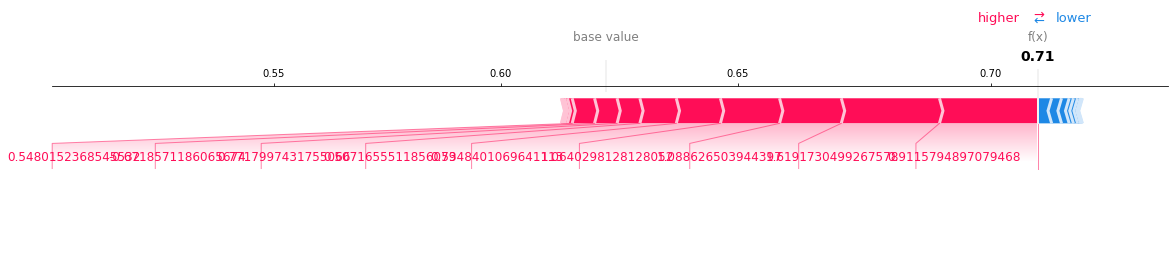

In [25]:
import matplotlib
import matplotlib.pyplot as plt
# print( shap_values_list )
# print the JS visualization code to the notebook
shap.initjs()
# print(shap_values[0, :])
# print(usable_features[0, :])
# shap.summary_plot(shap_values[:, :], usable_features[:, :])

shap.force_plot(.5, shap_values[0,:], usable_features[0, :], link = "logit", matplotlib = True)  

In [26]:
shap.force_plot(.5, shap_values[:,:], usable_features[:, :], link="logit")

In [27]:
# traits[20]
# shap_values = np.sum(shap_values_list)
# usable_features

In [28]:
# GWAS_IDS = ['ieu-b-109', 'ukb-b-12064', 'ukb-b-13806', 'ukb-d-20405_0', 'ieu-b-38', 'ukb-b-6134', 'ieu-b-110', 'ukb-b-17627', 'ukb-b-19953', 'ukb-b-8476', 'ukb-d-20405_1', 'ukb-d-20405_2', 'ukb-b-2209', 'ukb-b-4424', 'ukb-b-7663', 
#             'ukb-b-18275', 'ukb-b-770', 'met-d-Total_C', 'ieu-b-25', 'ieu-b-111', 'ukb-b-3957', 'ieu-b-39', 'ukb-b-6324',
#            'ukb-a-257','ukb-b-14699','ukb-b-323']
# # new added
# # ukb-a-257 Hearing difficulty/problems: Yes
# # ukb-b-14699 Illnesses of mother: Alzheimer's disease/dementia
# # ukb-b-323 Illnesses of father: Alzheimer's disease/dementia
GWAS_IDS=[
'ukb-b-2209',
'ieu-b-39',
'ukb-b-4424',
'ukb-b-7663',
'ukb-d-20405_2',
'ukb-b-6324',
'ieu-b-111',
'ukb-b-13806',
'ieu-b-25',
'ukb-d-20405_1',
'ukb-b-14699',
'ukb-b-770',
'ieu-b-109',
'ukb-d-20405_0',
'ieu-b-110',
'ukb-b-17627',
'ukb-a-257',
'ieu-b-38',
'ukb-b-18275',
'ukb-b-3957'   
]

# traits = ['HDL cholesterol', 'Non-cancer illness code, self-reported: depression', 
#           'Non-cancer illness code, self-reported: type 2 diabetes', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 
#           'systolic blood pressure', 'Age completed full time education', 'LDL cholesterol', 
#           'Non-oily fish intake', 'Body mass index (BMI)', 'Loneliness, isolation', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year',
#           'Oily fish intake', 'Sleep duration', 'Types of physical activity in last 4 weeks: Strenuous sports', 
#           'Hearing difficulty/problems with background noise', 'Other meat intake', 'Total cholesterol', 
#           'Cigarettes per Day', 'triglycerides', 'Sleeplessness / insomnia', 'diastolic blood pressure', 
#           'Processed meat intake','Hearing difficulty/problems: Yes','Illnesses of mother: Alzheimer\'s disease/dementia','Illnesses of father: Alzheimer\'s di



# for GWAS_ID in GWAS_IDS:
#     print(GWAS_ID)
# traits = ['HDL cholesterol', 'Non-cancer illness code, self-reported: depression', 
#           'Non-cancer illness code, self-reported: type 2 diabetes', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 
#           'systolic blood pressure', 'Age completed full time education', 'LDL cholesterol', 
#           'Non-oily fish intake', 'Body mass index (BMI)', 'Loneliness, isolation', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year',
#           'Oily fish intake', 'Sleep duration', 'Types of physical activity in last 4 weeks: Strenuous sports', 
#           'Hearing difficulty/problems with background noise', 'Other meat intake', 'Total cholesterol', 
#           'Cigarettes per Day', 'triglycerides', 'Sleeplessness / insomnia', 'diastolic blood pressure', 
#           'Processed meat intake','Hearing difficulty/problems: Yes','Illnesses of mother: Alzheimer\'s disease/dementia','Illnesses of father: Alzheimer\'s disease/dementia']

# # https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# # usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
# shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits))

34


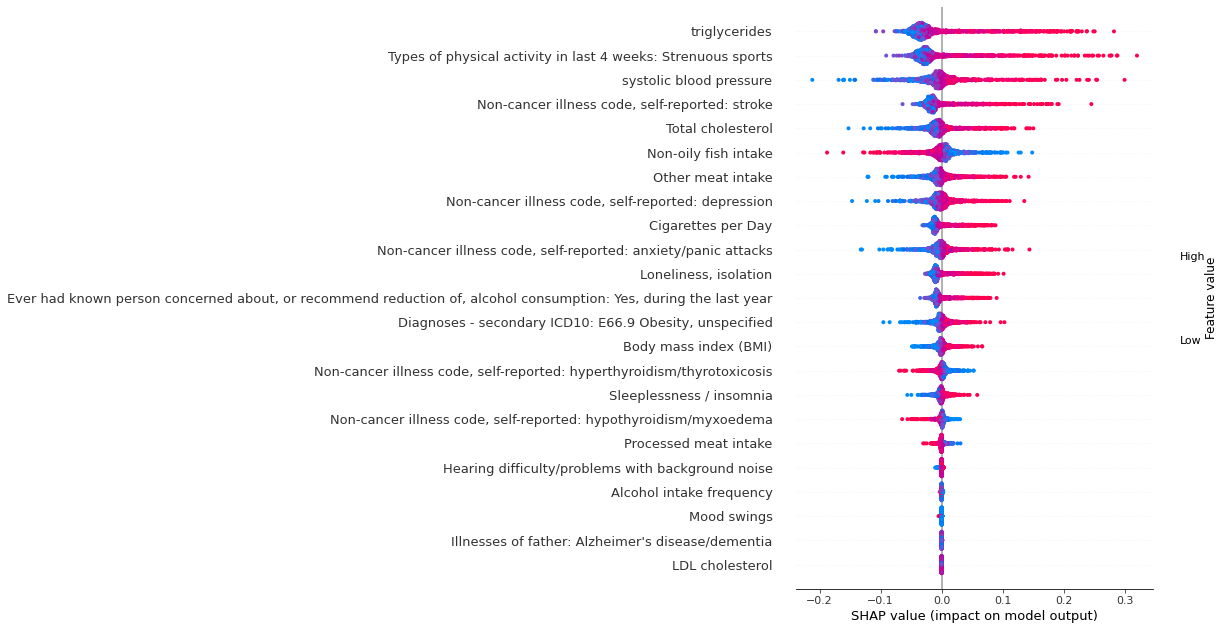

In [29]:
import json
# in place of json straight took it hardcoded

all_traits = json.load(open('traits_map.json', 'r'))
# print(all_traits)
GWAS_IDS = list(all_traits)
# print(GWAS_IDS)
traits = [all_traits[x] for x in all_traits]
print(len(traits))
# for trait in traits:
#     print(trait)
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits), show = False)
plt.savefig('shap/' + str(num_features) + '/summary_plot_hidden_'+ str(hidden) + '_dim_' + str(hidden_dimension) + '.pdf',  bbox_inches='tight')
# shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='dot', max_display=len(traits))

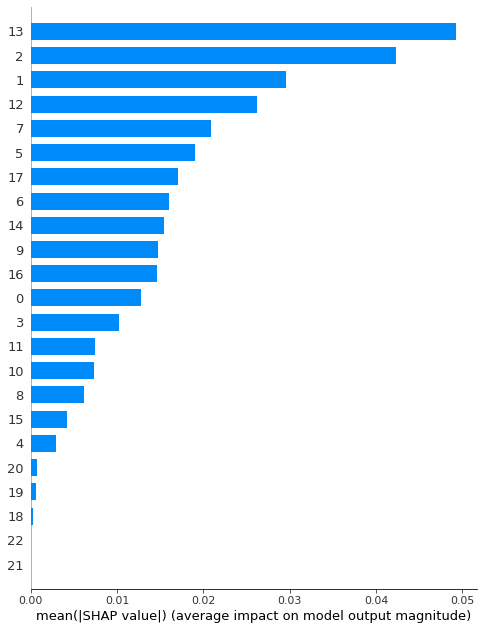

In [30]:
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='bar', max_display=len(traits), show=False)
# plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '_bar.png', bbox_inches='tight')
# naeem modified
shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(num_features)), plot_type='bar', max_display=len(traits), show=False)
plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '_bar.png', bbox_inches='tight')

In [31]:
sorted(list(zip(list(range(23)), abs(shap_values).mean(0))), key=lambda x:x[1], reverse=True)

[(13, 0.04924908715073352),
 (2, 0.04236235628364974),
 (1, 0.0296197191501232),
 (12, 0.026244688566025753),
 (7, 0.020918064481431825),
 (5, 0.019020123392881932),
 (17, 0.017042860703253313),
 (6, 0.016073097781935223),
 (14, 0.015469447992182896),
 (9, 0.014692388699692494),
 (16, 0.014644513753344973),
 (0, 0.012794306549247196),
 (3, 0.01024257860895398),
 (11, 0.007398677268558652),
 (10, 0.0073124123531225094),
 (8, 0.006150082970119529),
 (15, 0.0042340804912027845),
 (4, 0.0029270208818264246),
 (20, 0.0007416728415151617),
 (19, 0.0005812491878987717),
 (18, 0.0002853661904273256),
 (22, 8.46504053726264e-05),
 (21, 7.206166542256855e-05)]

In [32]:
help(shap.force_plot)


Help on function force in module shap.plots._force:

force(base_value, shap_values=None, features=None, feature_names=None, out_names=None, link='identity', plot_cmap='RdBu', matplotlib=False, show=True, figsize=(20, 3), ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, contribution_threshold=0.05)
    Visualize the given SHAP values with an additive force layout.
    
    Parameters
    ----------
    base_value : float
        This is the reference value that the feature contributions start from. For SHAP values it should
        be the value of explainer.expected_value.
    
    shap_values : numpy.array
        Matrix of SHAP values (# features) or (# samples x # features). If this is a 1D array then a single
        force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.
    
    features : numpy.array
        Matrix of feature values (# features) or (# samples x # features). This provides the values of all the
        features, an

In [33]:

# print(Final_Samples)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier, MLPRegressor, BernoulliRBM

feature_indices_to_consider = list(range(0, 23)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

Final_Samples = positive_samples[:500] + negative_samples[:500]
random.seed(2);random.shuffle(Final_Samples)
# Final_Samples = np.array(Final_Samples)
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
print(sum(usable_labels), len(usable_labels))

X_train, X_test, y_train, y_test = train_test_split(
    usable_features, usable_labels, test_size=0.1)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

print(y_test.sum(), y_test.shape)
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
# clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam').fit(X_train, y_train)
clf.score(X_test, y_test)

500 500
500.0 1000
50.0 (100,)


0.69

In [34]:
random.shuffle(Final_Samples)
usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])


from sklearn.model_selection import KFold
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)
# print(y_test)
accuracies = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    print(clf.score(X_test, y_test))
    accuracies += [clf.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))


KFold(n_splits=10, random_state=None, shuffle=False)
0.63
0.52
0.56
0.65
0.67
0.58
0.72
0.55
0.6
0.51
0.599 0.0645677938294317


In [35]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

accuracies = []
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = RandomForestClassifier(random_state=0)
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    accuracies += [reg.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))
save_in_file("Random Forest", np.mean(accuracies))

Accuracy of model :  61.0 %
Accuracy of model :  60.0 %
Accuracy of model :  56.00000000000001 %
Accuracy of model :  70.0 %
Accuracy of model :  68.0 %
Accuracy of model :  56.00000000000001 %
Accuracy of model :  72.0 %
Accuracy of model :  56.00000000000001 %
Accuracy of model :  62.0 %
Accuracy of model :  55.00000000000001 %
0.616 0.06003332407921451


In [36]:
from xgboost import XGBRegressor, XGBClassifier
model_name = "XGB"

accuracies = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = XGBClassifier()
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    accuracies += [reg.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))
save_in_file("XGBoost", np.mean(accuracies))


[10:46:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of model :  59.0 %
[10:46:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of model :  60.0 %
[10:46:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of model :  56.00000000000001 %
[10:46:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was 

In [37]:
import csv

# open the file in the write mode
f = open('model_global_best_accuracy.csv', 'a')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerow(['num_features','num_nn_layers','global_best_accuracy'])
writer.writerow([str(num_features),str(hidden),str(global_best_acc_val)])

# close the file
f.close()

In [38]:
feature_indices_to_consider = list(range(0, num_features)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

print(usable_features.shape)
print( len( usable_labels ) )
print(type(usable_features))

(1000, 23)
1000
<class 'numpy.ndarray'>


In [39]:
import seaborn as sns

total_features = np.c_[ usable_features, usable_labels ]
print(total_features.shape)

(1000, 24)


In [40]:
column_list = list(range(num_features + 1))
print( column_list )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [41]:
df = pd.DataFrame(total_features, columns = column_list )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.625797,-0.817553,-0.760936,-1.857359,-0.093345,0.170532,0.371805,0.239083,0.139910,-1.624696,...,-0.018879,-0.704748,-1.231747,0.015931,-0.242153,-0.163023,-0.869541,-0.148169,-0.428414,0.0
1,-0.837356,1.145843,-0.989856,-1.273906,0.615775,0.669612,-0.766881,-2.114654,-1.179737,0.291338,...,-0.253470,-0.414790,-1.022703,2.323385,-1.043250,-0.040811,-0.569414,-0.991610,-0.674050,1.0
2,0.651887,1.119177,0.420758,0.083595,1.108143,0.146180,-0.282527,-0.484679,-0.107216,-0.152003,...,0.459730,0.322980,-0.043573,0.921465,0.108599,-0.832837,0.734884,-0.307760,0.829428,1.0
3,-0.966776,-0.555386,-1.047032,2.013904,-0.019856,-0.032268,-1.047000,0.966705,1.622945,-1.549044,...,-0.509108,-0.891006,-1.511112,-2.045710,-1.485694,-0.234344,-1.199039,0.794414,-0.139376,0.0
4,-0.010329,-0.146175,-0.460297,0.533867,-0.859686,-1.517415,0.451512,1.003182,-2.912039,-0.059986,...,0.830804,-0.231513,-0.225727,-0.607299,-0.505462,1.078687,0.069538,-0.791444,0.288358,1.0


<AxesSubplot:>

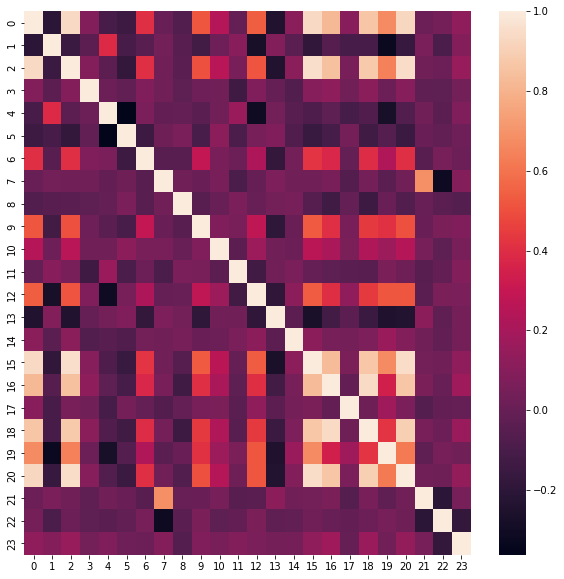

In [42]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = df.corr()
sns.heatmap(corr)

In [43]:
# print(corr)
for i in range(num_features):
    if (corr[i][num_features] > 0.01
       ) :
        print(i)
#     for j in range(num_features):
#         if ( corr[i][j] > 0.9 ) and ( i != j ):
#             print(i, j, corr[i][j])

0
1
2
3
4
5
6
7
9
10
11
12
13
14
15
16
18
19
20
21


0, 2, 10, 15, 16, 18, 20 = > 0.1

0, 1, 2, 4, 7, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21 = > 0.05